In [ ]:

!pip install pandas
!pip install pandasql
!pip install plotly
!pip install --upgrade 'sqlalchemy<2.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=9150819a497093f14b32a3d965a4af674c4ecb3761dc1fe8d74305162d033f8c
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.8 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.16
    Uninstalling SQLAlchemy-2.0.16:
      Successfully uninstalled SQLAlchemy-2.0.16


In [ ]:
# Library data manipulation
import pandas as pd
import pandasql as ps
import seaborn as sns
import matplotlib.pyplot as plt
# Library Data Visualization
import plotly.express as px
import plotly.graph_objects as go
import re as re

In [ ]:
listing = pd.read_csv ('/content/DQLab_listings(22Sep2022).csv')

In [ ]:
listing.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Bukit Timah,1.33432,103.78521,Private room,80,92,365
1,1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
2,2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,Tampines,1.34754,103.95958,Private room,85,92,265
3,3,71903,Room 2-near Airport & EXPO,367042,Belinda,Tampines,1.34531,103.96100,Private room,85,92,365
4,4,275344,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,1.28836,103.81144,Private room,49,60,296


In [ ]:
listing

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Bukit Timah,1.334320,103.785210,Private room,80,92,365
1,1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340
2,2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,Tampines,1.347540,103.959580,Private room,85,92,265
3,3,71903,Room 2-near Airport & EXPO,367042,Belinda,Tampines,1.345310,103.961000,Private room,85,92,365
4,4,275344,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,1.288360,103.811440,Private room,49,60,296
...,...,...,...,...,...,...,...,...,...,...,...,...
4156,4156,720000271010003429,"Marine Parade 2br w/ gym, bbq & pool, nr airport",466330896,Blueground,Marine Parade,1.299569,103.898567,Entire home/apt,263,92,365
4157,4157,720000552643956732,"Orchard 2br w/ gym, bbq & pool, nr Somerset MRT",466330896,Blueground,Newton,1.301816,103.839077,Entire home/apt,354,92,365
4158,4158,720695231887902167,Zi Xuan Apartments,480404953,Natividad,Newton,1.307921,103.831502,Entire home/apt,398,4,358
4159,4159,720724511357857504,#7 Studio with toilet & kitchen @Sks Pavillion,158018542,Betris,Woodlands,1.470580,103.762420,Private room,27,1,87


In [ ]:
listing.isnull().sum()

Unnamed: 0          0
id                  0
name                0
host_id             0
host_name           0
neighbourhood       0
latitude            0
longitude           0
room_type           0
price               0
minimum_nights      0
availability_365    0
dtype: int64

<Axes: >

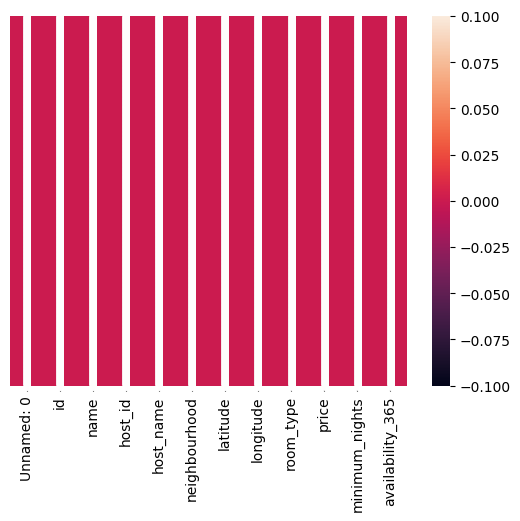

In [ ]:
sns.heatmap(listing.isnull(), yticklabels = False , annot = True)

In [ ]:
listing.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
review = pd.read_csv ('/content/DQLab_reviews(22Sep2022).csv')
review.head()

,Unnamed: 0,listing_id,date
0,28,71609,2018-07-14
1,29,71609,2019-01-06
2,30,71609,2019-07-27
3,31,71609,2019-08-11
4,32,71609,2019-09-07


In [ ]:
review.isnull().sum()

Unnamed: 0    0
listing_id    0
date          0
dtype: int64

In [ ]:
review.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
review.sort_values(by = ["date"], ascending = True).reset_index(drop = True)

,listing_id,date
0,5827998,2018-01-01
1,2387715,2018-01-01
2,5889741,2018-01-01
3,12484261,2018-01-01
4,18674998,2018-01-01
...,...,...
49690,42079889,2022-09-22
49691,28212124,2022-09-22
49692,580226596963352685,2022-09-22
49693,4008423,2022-09-22


In [ ]:
neighborhood = pd.read_csv ('/content/DQLab_nieghbourhood(22Sep2022).csv')
neighborhood.head()

,Unnamed: 0,neighbourhood_group,neighbourhood
0,0,Central Region,Bishan
1,1,Central Region,Bukit Merah
2,2,Central Region,Bukit Timah
3,3,Central Region,Downtown Core
4,4,Central Region,Geylang


In [ ]:
neighborhood.isnull().sum()

Unnamed: 0             0
neighbourhood_group    0
neighbourhood          0
dtype: int64

In [ ]:
neighborhood.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
listing = listing.drop_duplicates(keep = False)
listing.count()

id                  4161
name                4161
host_id             4161
host_name           4161
neighbourhood       4161
latitude            4161
longitude           4161
room_type           4161
price               4161
minimum_nights      4161
availability_365    4161
dtype: int64

In [ ]:
review.head()

,listing_id,date
0,71609,2018-07-14
1,71609,2019-01-06
2,71609,2019-07-27
3,71609,2019-08-11
4,71609,2019-09-07


In [ ]:
review.rename(columns = {'listing_id':'id'}, inplace = True)
review.head()

,id,date
0,71609,2018-07-14
1,71609,2019-01-06
2,71609,2019-07-27
3,71609,2019-08-11
4,71609,2019-09-07


In [ ]:
review = review.drop_duplicates(subset = ["id","date"], keep = False)
review.count()

id      48440
date    48440
dtype: int64

In [ ]:
q_hi  = listing["price"].quantile(0.99)
print(q_hi)
listing= listing[(listing["price"] < q_hi) & (listing["price"] > 0)]

1306.7999999999956


In [ ]:
neighborhood.head()

,neighbourhood_group,neighbourhood
0,Central Region,Bishan
1,Central Region,Bukit Merah
2,Central Region,Bukit Timah
3,Central Region,Downtown Core
4,Central Region,Geylang


In [ ]:
neighborhood = neighborhood.drop_duplicates(keep = False)

In [ ]:
review.isnull().sum()

id      0
date    0
dtype: int64

In [ ]:
neighborhood.isnull().sum()

neighbourhood_group    0
neighbourhood          0
dtype: int64

In [ ]:
review.sort_values(by = ["date"], ascending = True).reset_index(drop = True)

,id,date
0,4664392,2018-01-01
1,19101560,2018-01-01
2,9268680,2018-01-01
3,13274269,2018-01-01
4,4008423,2018-01-01
...,...,...
48435,49523939,2022-09-22
48436,42079889,2022-09-22
48437,54382047,2022-09-22
48438,47945468,2022-09-22


In [ ]:
review_listing = pd.merge (listing, review, on = 'id')

In [ ]:
listing.price.min()

13

In [ ]:
review_listing.isnull().sum()

id                  0
name                0
host_id             0
host_name           0
neighbourhood       0
latitude            0
longitude           0
room_type           0
price               0
minimum_nights      0
availability_365    0
date                0
dtype: int64

In [ ]:
merge_all = pd.merge (review_listing, neighborhood, on = 'neighbourhood')

In [ ]:
merge_all.isna().sum()

id                     0
name                   0
host_id                0
host_name              0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
availability_365       0
date                   0
neighbourhood_group    0
dtype: int64

In [ ]:
merge_all.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,date,neighbourhood_group
0,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2018-07-14,East Region
1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-01-06,East Region
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-07-27,East Region
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-08-11,East Region
4,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-09-07,East Region


In [ ]:
mean_price = merge_all.groupby ('room_type')['price'].mean().reset_index()
mean_price = mean_price.sort_values(by = "price", ascending = False)

In [ ]:
mean_price.head()

,room_type,price
2,Private room,126.687016
1,Hotel room,117.289445
0,Entire home/apt,100.415423
3,Shared room,50.703857


In [ ]:
room_price_fig = px.bar (mean_price, x = 'room_type', y = 'price',template="simple_white")
room_price_fig.show()

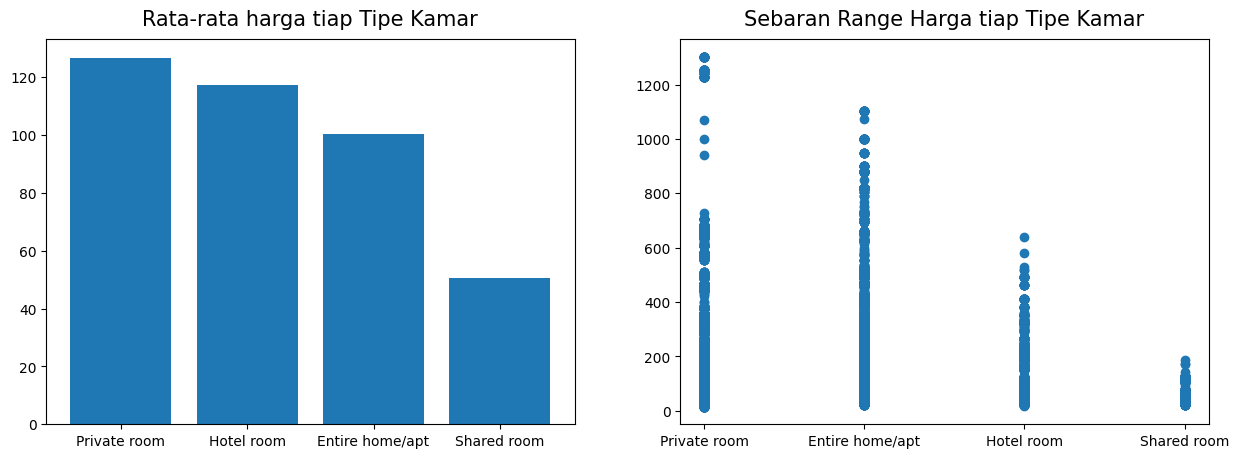

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].bar(mean_price["room_type"], mean_price["price"])
axes[0].set_title("Rata-rata harga tiap Tipe Kamar", fontsize=15, pad=10)
axes[1].scatter(merge_all["room_type"], merge_all["price"])
axes[1].set_title("Sebaran Range Harga tiap Tipe Kamar", fontsize=15, pad=10)
fig.show()

In [ ]:
merge_all['date_year'] = merge_all ['date'].str.slice(0,4)
merge_all.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,date,neighbourhood_group,date_year
0,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2018-07-14,East Region,2018
1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-01-06,East Region,2019
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-07-27,East Region,2019
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-08-11,East Region,2019
4,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-09-07,East Region,2019


In [ ]:
trend_price= merge_all.groupby (['neighbourhood_group', 'date_year'])['price'].mean().reset_index()
trend_price

,neighbourhood_group,date_year,price
0,Central Region,2018,128.018137
1,Central Region,2019,135.372318
2,Central Region,2020,153.452354
3,Central Region,2021,183.430878
4,Central Region,2022,323.395863
5,East Region,2018,101.025287
6,East Region,2019,96.687348
7,East Region,2020,122.074627
8,East Region,2021,187.865854
9,East Region,2022,224.000000


In [ ]:
fig_trend_neighborhood = px.line(trend_price,x="date_year",y="price",color="neighbourhood_group",template="seaborn",color_discrete_sequence=["#D14D72","#569DAA","#89375F","#FF8400","#7AA874"], markers=True , width = 1000)

fig_trend_neighborhood.update_layout(title="<b>Trend Harga Tiap Tahun Berdasarkan Region</b>", title_font=dict(size=25,family="arial", color = 'salmon'),title_x = 0.5)

fig_trend_neighborhood.update_xaxes(title="<b>Total Harga</b>",title_font=dict(size=15,family="arial"))
fig_trend_neighborhood.update_yaxes(title="<b>Tahun</b>",title_font=dict(size=15,family="arial"))
fig_trend_neighborhood.show()

In [ ]:
merge_all['date_month'] = merge_all ['date'].str.slice(0,7)
merge_all.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,date,neighbourhood_group,date_year,date_month
0,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2018-07-14,East Region,2018,2018-07
1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-01-06,East Region,2019,2019-01
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-07-27,East Region,2019,2019-07
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-08-11,East Region,2019,2019-08
4,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-09-07,East Region,2019,2019-09


In [ ]:
neighborhood.duplicated().sum()

0

In [ ]:
merge_all.drop_duplicates(keep = False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,date,neighbourhood_group,date_year,date_month
0,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2018-07-14,East Region,2018,2018-07
1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-01-06,East Region,2019,2019-01
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-07-27,East Region,2019,2019-07
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-08-11,East Region,2019,2019-08
4,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-09-07,East Region,2019,2019-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48322,53579193,Premier Deluxe Room of MBS Hotel 金沙酒店奢华度假豪华房尊贵房,46075735,Sweet Home,Marina South,1.28359,103.86182,Private room,1302,1,86,2022-07-23,Central Region,2022,2022-07
48323,53579193,Premier Deluxe Room of MBS Hotel 金沙酒店奢华度假豪华房尊贵房,46075735,Sweet Home,Marina South,1.28359,103.86182,Private room,1302,1,86,2022-07-31,Central Region,2022,2022-07
48324,53579193,Premier Deluxe Room of MBS Hotel 金沙酒店奢华度假豪华房尊贵房,46075735,Sweet Home,Marina South,1.28359,103.86182,Private room,1302,1,86,2022-08-21,Central Region,2022,2022-08
48325,540170321699689740,PasirPutih Travel Homestay(10pax)MYPGU-PasirGu...,318843294,Adam,North-Eastern Islands,1.43927,103.93205,Entire home/apt,47,2,181,2022-05-16,North-East Region,2022,2022-05


In [ ]:
trend_listing= merge_all.groupby ('date_month')['id'].count().reset_index()
trend_listing.head()

,date_month,id
0,2018-01,445
1,2018-02,429
2,2018-03,506
3,2018-04,524
4,2018-05,545


In [ ]:
trend_listing.to_csv("test 1.csv")

In [ ]:
fig_trend_listing = px.line(trend_listing,x="date_month",y="id")
fig_trend_listing.update_layout(title="<b>Trend Jumlah Listing Tiap Bulan</b>", title_font=dict(size=25,family="arial", color = 'black'),title_x = 0.5, width = 1200, height = 600)

fig_trend_listing.update_xaxes(title="<b>Bulan</b>",title_font=dict(size=15,family="arial"))
fig_trend_listing.update_yaxes(title="<b>Jumlah Listing</b>",title_font=dict(size=15,family="arial"))

#Annotation
fig_trend_listing.add_annotation (text = "Terendah pada<br>April 2020", x = "2020-01", y = 200, showarrow = False, bordercolor = 'blue')
fig_trend_listing.add_annotation (text = "Tertinggi pada<br>Agustus 2022", x = "2022-04", y = 2245, showarrow = False, bordercolor = 'blue')
fig_trend_listing.show()

In [ ]:
trend_listing_type= merge_all.groupby (['date_month', 'room_type'])['id'].count().reset_index()
trend_listing_type.head()

,date_month,room_type,id
0,2018-01,Entire home/apt,170
1,2018-01,Hotel room,44
2,2018-01,Private room,206
3,2018-01,Shared room,25
4,2018-02,Entire home/apt,179


In [ ]:
fig_trend_listing_type = px.line(trend_listing_type,x="date_month",y="id", color="room_type",template="seaborn",color_discrete_sequence=["#D14D72","#569DAA","#89375F","#FF8400","#7AA874"], width = 1200, height = 600)

#Title Update
fig_trend_listing_type.update_layout(title="<b>Trend Penyewaan Tiap Bulan<br>Berdasarkan Tipe Kamar</b>", title_font=dict(size=18,family="arial", color = 'teal'),title_x = 0.5)

#X & Y Update
fig_trend_listing_type.update_xaxes(title="<b>Bulan</b>",title_font=dict(size=15,family="arial"))
fig_trend_listing_type.update_yaxes(title="<b>Jumlah Listing</b>",title_font=dict(size=15,family="arial"))


fig_trend_listing_type.show()

In [ ]:
pd.value_counts(merge_all.id)

25360027              413
27292304              352
24834130              334
26672993              291
27419905              287
                     ... 
584711831372191686      1
31657383                1
32533341                1
33060127                1
34964444                1
Name: id, Length: 2475, dtype: int64

In [ ]:
test = px.scatter(listing,x="longitude",y="latitude",color =listing.price)
test.update_layout(title="<b>Peta Sebaran Harga Berdasarkan Lokasi</b>", title_font=dict(size=25,family="arial", color = 'black'),title_x = 0.5)

test.update_xaxes(title="<b>Longitude</b>",title_font=dict(size=15,family="arial"))
test.update_yaxes(title="<b>Latitude</b>",title_font=dict(size=15,family="arial"))
test.show()

In [ ]:
df_listing_price = listing.groupby ('price')['id'].count().reset_index()
df_listing_price

,price,id
0,13,1
1,14,2
2,15,1
3,16,4
4,18,3
...,...,...
593,1261,1
594,1262,1
595,1287,1
596,1300,2


In [ ]:
df_listing_price.rename(columns = {'id':'count'}, inplace = True)
df_listing_price.head()

,price,count
0,13,1
1,14,2
2,15,1
3,16,4
4,18,3


In [ ]:
fig_listing_harga = px.line(df_listing_price, x = "price", y = "count")
fig_listing_harga.show()

In [ ]:
#mean price neighbourhood marianda south
listing.groupby ('neighbourhood')['price'].mean().reset_index()

,neighbourhood,price
0,Ang Mo Kio,104.500000
1,Bedok,147.247934
2,Bishan,175.594595
3,Bukit Batok,117.208333
4,Bukit Merah,193.286585
5,Bukit Panjang,124.769231
6,Bukit Timah,130.146341
7,Central Water Catchment,345.400000
8,Choa Chu Kang,62.545455
9,Clementi,315.693548


In [ ]:
listing.price.median()
listing.price.mean()

183.11996114618748

In [ ]:
listing_count = merge_all.groupby ('neighbourhood_group')['id'].count().reset_index()
listing_count.head(10)

,neighbourhood_group,id
0,Central Region,17297
1,East Region,2015
2,North Region,22792
3,North-East Region,1026
4,West Region,5197


In [ ]:
listing_count = listing_count.sort_values(by = "id", ascending = True)
listing_count.head()

,neighbourhood_group,id
3,North-East Region,1026
1,East Region,2015
4,West Region,5197
0,Central Region,17297
2,North Region,22792


In [ ]:
listing_count.to_excel("listing_count.xlsx")

In [ ]:
fig_listing_count = px.bar(listing_count,x="neighbourhood_group",y="id", color = 'neighbourhood_group', width = 800, color_discrete_sequence=["#D14D72","#569DAA","#696969","#FF8400","#8FBC8F"],text_auto = True)

#Title Update
fig_listing_count.update_layout(title="<b>Jumlah Listing Tiap Region</b>", title_font=dict(size=18,family="arial", color = 'teal'),title_x = 0.5)

#X & Y Update
fig_listing_count.update_xaxes(title="<b>Region</b>",title_font=dict(size=15,family="arial"))
fig_listing_count.update_yaxes(title="<b>Jumlah Listing</b>",title_font=dict(size=15,family="arial"))


fig_listing_count.show()

In [ ]:
listing_count2 = merge_all.groupby (['neighbourhood_group', 'neighbourhood'])['id'].count().reset_index()
listing_count2.head(10)

,neighbourhood_group,neighbourhood,id
0,Central Region,Bishan,91
1,Central Region,Bukit Merah,1183
2,Central Region,Bukit Timah,239
3,Central Region,Downtown Core,2355
4,Central Region,Geylang,1725
5,Central Region,Kallang,2908
6,Central Region,Marina South,105
7,Central Region,Marine Parade,380
8,Central Region,Museum,145
9,Central Region,Newton,308


In [ ]:
listing_price_type = merge_all.groupby (['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
listing_price_type.head()

,neighbourhood_group,room_type,price
0,Central Region,Entire home/apt,221.407142
1,Central Region,Hotel room,134.235843
2,Central Region,Private room,153.844496
3,Central Region,Shared room,50.584746
4,East Region,Entire home/apt,200.589595


In [ ]:
listing_roomtype = merge_all.groupby (['neighbourhood_group', 'room_type'])['id'].count().reset_index()
listing_roomtype['Total_sum'] = listing_roomtype.id*listing_price_type.price
listing_roomtype

,neighbourhood_group,room_type,id,Total_sum
0,Central Region,Entire home/apt,6413,1419884.0
1,Central Region,Hotel room,1501,201488.0
2,Central Region,Private room,8675,1334601.0
3,Central Region,Shared room,708,35814.0
4,East Region,Entire home/apt,519,104106.0
5,East Region,Private room,1496,112165.0
6,North Region,Entire home/apt,21482,1492535.0
7,North Region,Hotel room,337,14090.0
8,North Region,Private room,961,40503.0
9,North Region,Shared room,12,276.0


In [ ]:
fig_listing_roomtype = px.bar(listing_roomtype,x="neighbourhood_group",y="id", color="room_type",template="seaborn", barmode = "group", width = 900)

#Title Update
fig_listing_roomtype.update_layout(title="<b>Jumlah Listing Tiap Region<br>Berdasarkan Tipe Kamar</b>", title_font=dict(size=18,family="arial", color = 'teal'),title_x = 0.5)

#X & Y Update
fig_listing_roomtype.update_xaxes(title="<b>Region</b>",title_font=dict(size=15,family="arial"))
fig_listing_roomtype.update_yaxes(title="<b>Jumlah Listing</b>",title_font=dict(size=15,family="arial"))


fig_listing_roomtype.show()

In [ ]:
fig_listing_roomtype = px.bar(listing_roomtype,x="neighbourhood_group",y="Total_sum", color="room_type",template="seaborn", barmode = "group", width = 900)

#Title Update
fig_listing_roomtype.update_layout(title="<b>Jumlah Pemasukan Total Tiap Region<br>Berdasarkan Tipe Kamar</b>", title_font=dict(size=18,family="arial", color = 'teal'),title_x = 0.5)

#X & Y Update
fig_listing_roomtype.update_xaxes(title="<b>Region</b>",title_font=dict(size=15,family="arial"))
fig_listing_roomtype.update_yaxes(title="<b>Jumlah Pemasukan Total</b>",title_font=dict(size=15,family="arial"))


fig_listing_roomtype.show()

In [ ]:
north_region = listing_price_type.query('neighbourhood_group == "North Region"')
north_region

,neighbourhood_group,room_type,price
6,North Region,Entire home/apt,69.478401
7,North Region,Hotel room,41.810089
8,North Region,Private room,42.146722
9,North Region,Shared room,23.000000


In [ ]:
fig_north_region = px.bar(north_region,x="room_type",y="price", color = "room_type" ,template="seaborn", barmode = "group", width = 700, color_discrete_sequence=["#D14D72","#569DAA","#89375F","#FF8400"])

#Title Update
fig_north_region.update_layout(title="<b>Harga Rata-rata North Region<br>Berdasarkan Tipe Kamar</b>", title_font=dict(size=18,family="arial", color = 'teal'),title_x = 0.5)

#X & Y Update
fig_north_region.update_xaxes(title="<b>Tipe Kamar</b>",title_font=dict(size=15,family="arial"))
fig_north_region.update_yaxes(title="<b>Harga</b>",title_font=dict(size=15,family="arial"))


fig_north_region.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
north_region_count = listing_roomtype.query('neighbourhood_group == "North Region"')
north_region_count

In [ ]:
north_region_count.sort_values(by = "id", ascending = True).reset_index(drop = True)
north_region_count

In [ ]:
fig_north_region_count = px.bar(north_region_count,x="room_type",y="id", color = "room_type" ,template="seaborn", barmode = "group", width = 700, color_discrete_sequence=["#D14D72","#569DAA","#89375F","#FF8400"])

#Title Update
fig_north_region_count.update_layout(title="<b>Tipe Kamar Paling Dicari<br>Pada North Region</b>", title_font=dict(size=18,family="arial", color = 'teal'),title_x = 0.5)

#X & Y Update
fig_north_region_count.update_xaxes(title="<b>Tipe Kamar</b>",title_font=dict(size=15,family="arial"))
fig_north_region_count.update_yaxes(title="<b>Jumlah Listing</b>",title_font=dict(size=15,family="arial"))


fig_north_region_count.show()

In [ ]:
north_region_neighbourhood = merge_all.query('neighbourhood_group == "North Region"')
north_region_neighbourhood.head()

In [ ]:
north_count =north_region_neighbourhood.groupby ('neighbourhood')['id'].count().reset_index()
north_count.head(10)

In [ ]:
north_count = north_count.sort_values(by = "id", ascending = False).reset_index(drop = True)
north_count

In [ ]:
fig_north = px.bar(north_count,x="neighbourhood",y="id" ,template="seaborn",  color = "neighbourhood", barmode = "group", width = 800, color_discrete_sequence=["#D14D72","#569DAA","#89375F","#FF8400"], text_auto = True)

#Title Update
fig_north.update_layout(title="<b>Jumlah Listing North Regional<br>Tiap Neighbourhood</b>", title_font=dict(size=18,family="arial", color = 'teal'),title_x = 0.5)

#X & Y Update
fig_north.update_xaxes(title="<b>Neighbourhood</b>",title_font=dict(size=15,family="arial"))
fig_north.update_yaxes(title="<b>Jumlah Penyewaan</b>",title_font=dict(size=15,family="arial"))

fig_north.update_traces(textfont=dict(color="black", size=13))

fig_north.show()

In [ ]:
north_region_neighbourhood['name'] = north_region_neighbourhood['name'].str.replace('^\w\s',"")
north_region_neighbourhood

In [ ]:
name_north = north_region_neighbourhood.groupby (['name','neighbourhood'])['id'].count().reset_index()
name_north.head()

In [ ]:
name_north = name_north.sort_values(by = "id", ascending = False).head(5).reset_index(drop = True)
name_north

In [ ]:
fig_name_north = px.bar(name_north,x="id",y="name" ,template="seaborn", barmode = "group", width = 800, text_auto = True)

#Title Update
fig_name_north.update_layout(title="<b>Top 5 Properti di Woodlands</b>", title_font=dict(size=18,family="arial", color = 'teal'),title_x = 0.5)

#X & Y Update
fig_name_north.update_xaxes(title="<b>Jumlah Penyewaan</b>",title_font=dict(size=15,family="arial"))
fig_name_north.update_yaxes(title="<b>Nama Properti</b>",title_font=dict(size=15,family="arial"))

fig_name_north.update_traces(textfont=dict(color="black", size=13))

fig_name_north.show()